# Using new OpSim output from Rahul Biswas - astro_lsst_01_1068_sqlite.db
-----
Slightly different format


In [1]:
from __future__ import print_function ## Force python3-like printing
%matplotlib inline

try:
    from importlib import reload
except:
    pass

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import os
import time

import sqlite3
from sqlalchemy import create_engine

import LSST_tools.utils as utils
from LSST_tools.utils import colours as c

In [2]:
then = time.time()

# opsimdbpath = os.environ.get('OPSIMDBPATH')
opsimdbpath = "/Users/berto/data/LSST/OpSimOutputDBs/astro_lsst_01_1068_sqlite.db"
print(opsimdbpath)

conn = create_engine('sqlite:///'+opsimdbpath, echo = False)

/Users/berto/data/LSST/OpSimOutputDBs/astro_lsst_01_1068_sqlite.db


In [3]:
# opsimdf = pd.read_sql_query('SELECT * FROM Summary WHERE night = 1000', engine)
# opsimdf = pd.read_sql_query('SELECT * FROM Summary WHERE night < 366', engine)
opsimdf = pd.read_sql_table('Summary', con=conn)

In [4]:
now = time.time()
print(now - then)
# ddf = opsimdf.query('propID == 56') ## 56 is DDF
# filters = np.unique(ddf["filter"])
# print(filters)

97.89641094207764


In [5]:
# ddf

In [6]:
opsimdf

,obsHistID,sessionID,propID,fieldID,fieldRA,fieldDec,filter,expDate,expMJD,night,...,moonBright,darkBright,rawSeeing,wind,humidity,slewDist,slewTime,fiveSigmaDepth,ditheredRA,ditheredDec
0,1,1068,227,505,1.720374,-0.936476,y,2922,59580.033829,0,...,0.000000,105.043185,0.920473,0.0,0.0,1.659226,0.000000,21.013506,1.694604,-0.962927
1,2,1068,227,567,1.648235,-0.903353,y,2961,59580.034278,0,...,0.000000,101.373243,0.920473,0.0,0.0,0.054827,4.769109,21.058304,1.623562,-0.929804
2,3,1068,227,561,1.563788,-0.915583,y,3000,59580.034726,0,...,0.000000,98.042992,0.920473,0.0,0.0,0.053275,4.780469,21.099047,1.538724,-0.942034
3,4,1068,227,539,1.477422,-0.924531,y,3039,59580.035175,0,...,0.000000,95.139389,0.920473,0.0,0.0,0.053066,4.762092,21.134714,1.452062,-0.950982
4,5,1068,227,531,1.389669,-0.930365,y,3077,59580.035623,0,...,0.000000,92.619319,0.920473,0.0,0.0,0.052952,4.739055,21.165823,1.364111,-0.956816
5,6,1068,227,517,1.301075,-0.933239,y,3116,59580.036071,0,...,0.000000,90.448151,0.920473,0.0,0.0,0.052904,4.709074,21.192773,1.275418,-0.959690
6,7,1068,227,519,1.212198,-0.933238,y,3155,59580.036519,0,...,0.000000,88.596990,0.920473,0.0,0.0,0.052892,4.669665,21.215880,1.186541,-0.959689
7,8,1068,227,523,1.123604,-0.930366,y,3193,59580.036967,0,...,0.000000,87.040118,0.920473,0.0,0.0,0.052904,4.742319,21.235417,1.098046,-0.956817
8,9,1068,227,541,1.035849,-0.924530,y,3233,59580.037422,0,...,0.000000,85.753276,0.920473,0.0,0.0,0.052953,5.250509,21.251646,1.010489,-0.950981
9,10,1068,227,698,0.988892,-0.827713,y,3272,59580.037880,0,...,0.000000,83.013952,0.920473,0.0,0.0,0.101357,5.588682,21.286460,0.966319,-0.854164


In [7]:
len(opsimdf.fieldID.unique())

3339

In [8]:
df_groupby = opsimdf.groupby(by = "fieldID", as_index=False)

In [9]:
unique_field_df = pd.DataFrame(df_groupby.first())

In [10]:
type(unique_field_df)

pandas.core.frame.DataFrame

In [11]:
reload(utils)
utils.get_field_corners(unique_field_df)

,fieldID,obsHistID,sessionID,propID,fieldRA,fieldDec,filter,expDate,expMJD,night,...,humidity,slewDist,slewTime,fiveSigmaDepth,ditheredRA,ditheredDec,RA_upper,RA_lower,Dec_upper,Dec_lower
0,1,113,1068,226,0.000000,-1.570796,y,7294,59580.084432,0,...,0.0,0.042436,4.183352,20.826827,1.656371,-1.544346,0.030543,-0.030543,-1.601339,-1.540253
1,2,112,1068,226,3.141593,-1.528360,y,7256,59580.083990,0,...,0.0,0.054234,4.363492,20.788450,2.781605,-1.554811,3.172136,3.111050,-1.558903,-1.497817
2,3,72194,1068,226,5.654874,-1.528360,z,8122015,59674.004811,94,...,0.0,0.489736,36.639008,22.075311,5.879867,-1.531666,5.685417,5.624331,-1.558903,-1.497817
3,4,115,1068,226,0.628311,-1.528360,y,7371,59580.085320,0,...,0.0,0.049876,4.374723,20.889870,0.268323,-1.554811,0.658854,0.597768,-1.558903,-1.497817
4,5,23837,1068,226,4.398249,-1.528360,z,2770045,59612.060712,32,...,0.0,0.049877,4.539143,22.594887,4.083259,-1.544892,4.428792,4.367706,-1.558903,-1.497817
5,6,114,1068,226,1.884936,-1.528360,y,7333,59580.084876,0,...,0.0,0.042436,4.363108,20.873982,1.524948,-1.554811,1.915479,1.854393,-1.558903,-1.497817
6,7,2229,1068,226,3.769908,-1.488293,z,264658,59583.063179,3,...,0.0,0.054234,4.873584,22.162469,3.723579,-1.514744,3.800451,3.739365,-1.518836,-1.457750
7,8,111,1068,226,2.513277,-1.488293,y,7218,59580.083546,0,...,0.0,0.048814,4.306824,20.838265,2.327959,-1.514744,2.543820,2.482734,-1.518836,-1.457750
8,9,116,1068,226,0.000000,-1.488293,y,7410,59580.085765,0,...,0.0,0.054233,4.455024,20.890132,6.097867,-1.514744,0.030543,-0.030543,-1.518836,-1.457750
9,10,46711,1068,226,5.026557,-1.488292,u,5289319,59641.218981,61,...,0.0,0.190338,10.213644,22.282276,5.003393,-1.498211,5.057100,4.996014,-1.518835,-1.457749


In [12]:
import astropy.units as u

In [13]:
fov = 3.5*u.degree

In [14]:
fov

<Quantity 3.5 deg>

In [15]:
fov.to(u.radian).value

0.061086523819801536

In [16]:
import astropy.coordinates as coord
import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.coordinates import ICRS, Galactic, FK4, FK5  # Low-level frames
from astropy.coordinates import Angle, Latitude, Longitude  # Angles

In [17]:
columns_to_keep = ["fieldID", "fieldRA", "fieldDec", "RA_upper", "RA_lower", "Dec_upper", "Dec_lower"]
# [i for i in unique_field_df.columns if i in columns_to_keep] 
unique_field_df = unique_field_df[columns_to_keep]

In [18]:
# unique_field_df.to_csv("/Users/berto/Code/LSST_tools/data/minion_field_info.dat")

NameError: name 'ddf' is not defined

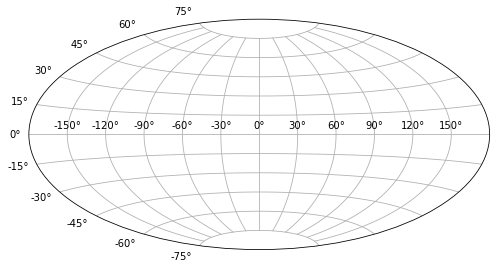

In [19]:
fig = plt.figure(figsize=[8, 4])

fig.subplots_adjust(left = 0.01, bottom = 0.05, top = 0.85, right = 0.99, hspace=0, wspace = 0)
ax = fig.add_subplot(111, projection="aitoff")
ax.grid(True)

ax.scatter(ddf["fieldRA"], ddf["fieldDec"])

In [44]:
coords_df = utils.generate_coordinates(1)
coords_df

,phi,theta
0,-0.259768,-1.040299


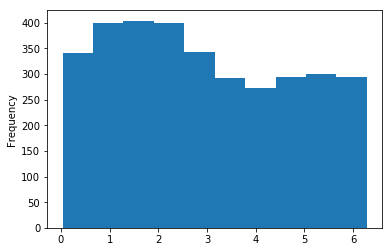

In [50]:
unique_field_df["RA_upper"].plot.hist()

In [71]:
unique_field_df[(unique_field_df["RA_upper"] >= coords_df["theta"][0] + np.pi) &
                (unique_field_df["RA_lower"] <= coords_df["theta"][0] + np.pi) &
                (unique_field_df["Dec_lower"] >= coords_df["phi"][0])  &
                (unique_field_df["Dec_upper"] <= coords_df["phi"][0])]

,fieldID,fieldRA,fieldDec,RA_upper,RA_lower,Dec_upper,Dec_lower
1923,1924,2.084594,-0.274999,2.115137,2.054051,-0.305542,-0.244456
2033,2034,2.111036,-0.233942,2.141579,2.080493,-0.264485,-0.203399


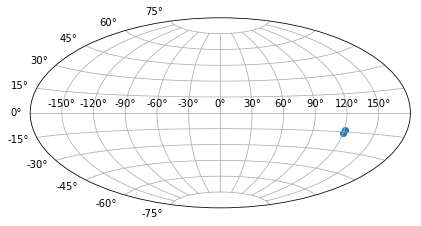

In [72]:
utils.plot_position_points(unique_field_df[(unique_field_df["RA_upper"] >= coords_df["theta"][0]+ np.pi) &
                                           (unique_field_df["RA_lower"] <= coords_df["theta"][0]+ np.pi) &
                                           (unique_field_df["Dec_lower"] >= coords_df["phi"][0])  &
                                           (unique_field_df["Dec_upper"] <= coords_df["phi"][0])])
# coords_df["theta"][0]

In [106]:
ids = unique_field_df[(unique_field_df["RA_upper"] >= coords_df["theta"][0] + np.pi) &
                (unique_field_df["RA_lower"] <= coords_df["theta"][0] + np.pi) &
                (unique_field_df["Dec_lower"] >= coords_df["phi"][0])  &
                (unique_field_df["Dec_upper"] <= coords_df["phi"][0])]

In [109]:
ids = pd.DataFrame(ids["fieldID"])
ids.iloc[0,:]

fieldID    1924
Name: 1923, dtype: int64

In [100]:
# opsimdf[opsimdf["fieldID"] == ids]
type(ids)

method

In [98]:
ids[0]

TypeError: 'method' object is not subscriptable